In [1]:
# CellStrat - Convolutional Neural Networks

# Here we develop CNN programs for image processing

# Ref : “Hands-on Machine Learning with Scikit-Learn and TensorFlow ” by Aurelien Geron

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

A couple utility functions to plot grayscale and RGB images:

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

And of course we will need TensorFlow:

In [4]:
import tensorflow as tf

# Convolutional layer

In [5]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
# CellStrat - convert color into grayscale by taking average of RGB colors per pixel along axis 2
# https://stackoverflow.com/questions/40700501/how-to-calculate-mean-color-of-image-in-numpy-array
# https://stackoverflow.com/questions/15819980/calculate-mean-across-dimension-in-a-2d-array
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

In [6]:
testfmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)

In [7]:
testfmap[:, :,0,0]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
testfmap[:, :,0,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
testfmap[:, 3, 0, 0] = 1

In [10]:
testfmap[:, :,0,0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [11]:
testfmap[:, :,0,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
testfmap[3, :, 0, 1] = 1

In [14]:
testfmap[:, :,0,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

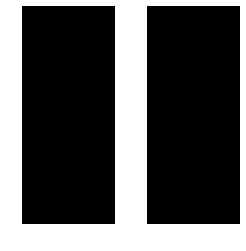

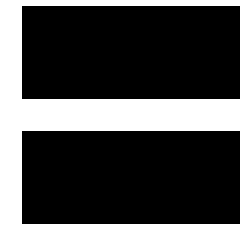

In [15]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[:, :, 0, 0]
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()



In [16]:
 tf.reset_default_graph()

In [17]:
# CellStrat - changed use_cudnn_on_gpu=False to use_cudnn_on_gpu=True, else it gives error.

In [19]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME", use_cudnn_on_gpu=True)


In [20]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

Saving figure china_original


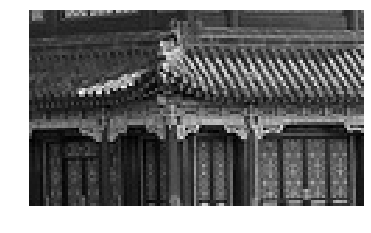

In [21]:
plot_image(images[0, :, :, 0])
save_fig("china_original", tight_layout=False)
plt.show()

Saving figure china_vertical


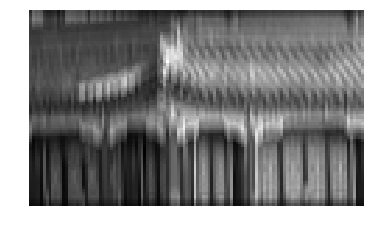

In [22]:
plot_image(output[0, :, :, 0])
save_fig("china_vertical", tight_layout=False)
plt.show()

Saving figure china_horizontal


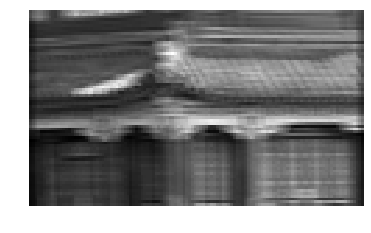

In [23]:
plot_image(output[0, :, :, 1])
save_fig("china_horizontal", tight_layout=False)
plt.show()

## Simple example

In [22]:
#CellStrat - the following code loads two images one Chinese temple and one flower.
#Then it creates two 7x7 filters one with vertical white line in middle and one with horizontal white line in middle.
#It applies these filters to the two images.

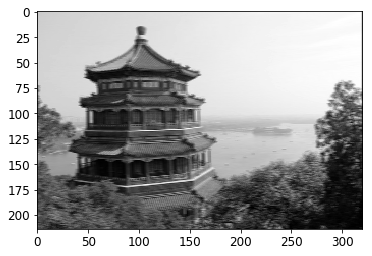

In [25]:
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map (horizontal filter on 1st image)
plt.show()

In [24]:
#CellStrat - Print the output of vertical filters and horizontal filters respectively.

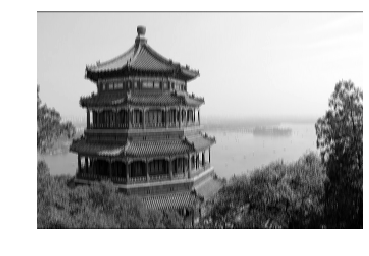

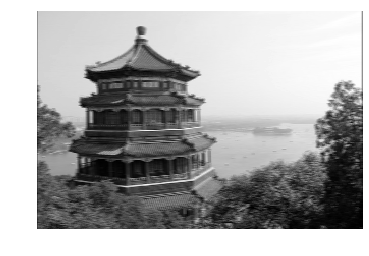

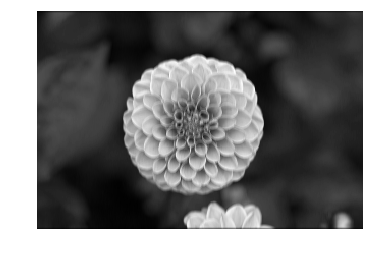

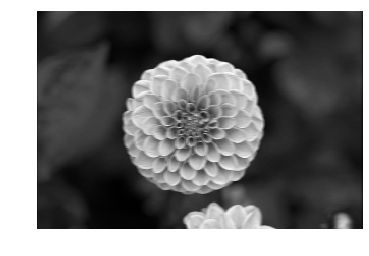

In [26]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [26]:
#CellStrat - Let's try using higher level tf.layers API

Using `tf.layers.conv2d()`:

In [27]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2],
                        padding="SAME")

W0629 10:10:23.187676 4716078528 deprecation.py:323] From <ipython-input-27-819ace688125>:5: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0629 10:10:23.192728 4716078528 deprecation.py:506] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

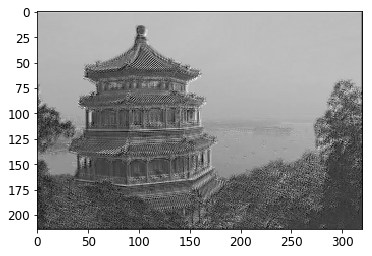

In [29]:
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map (horizontal filter on 1st image)
plt.show()

## VALID vs SAME padding

In [30]:
#CellStrat - lets take a sequence of nos 1 to 13 (inclusive). Apply a prime number filter of all numbers in this range.
#Check impact of applying filter for VALID or SAME padding.

In [31]:
reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [32]:
#CellStrat - visualize the effect of multiplying by filter of size 1x6 with and without SAME padding

In [33]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))


VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


# Pooling layer

In [27]:
#CellStrat - The following code creates a max pooling layer using a 2 × 2 kernel, stride 2, and no padding,
#then applies it to all the images in the dataset:

In [28]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

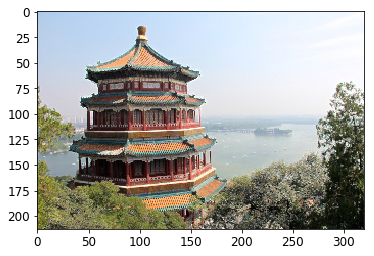

In [31]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
#we can similarly plot output for the second image output[1]
plt.show()

In [32]:
dataset[0].shape

(427, 640, 3)

In [34]:
output[0].shape

(213, 320, 3)

Saving figure china_original


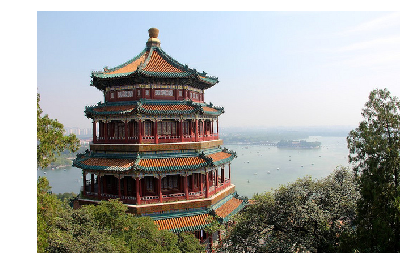

Saving figure china_max_pool


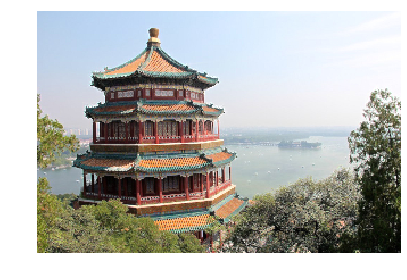

In [35]:
plot_color_image(dataset[0])
save_fig("china_original")
plt.show()
    
plot_color_image(output[0])
save_fig("china_max_pool")
plt.show()

# MNIST

In [38]:
#CellStrat - Lets apply CNNs for MNIST image classification.

In [39]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

#3rd layer is pooling layer
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

#next layer is fully connected layer
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

#next layer is softmax layer to classify images
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

#train step
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

#eval step
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

W0629 10:10:36.996375 4716078528 deprecation.py:323] From <ipython-input-39-209abc54ba3e>:42: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

W0629 10:10:56.778712 4716078528 deprecation.py:323] From <ipython-input-40-c50d5bb4a85c>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0629 10:10:56.780058 4716078528 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0629 10:10:56.860741 4716078528 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated a

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W0629 10:11:00.820864 4716078528 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


W0629 10:11:02.603919 4716078528 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [41]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        print("Layer1 and 2 filter")
        kernel1 = tf.get_collection(tf.GraphKeys.VARIABLES, 'conv1/kernel')[0]
        bias1 = tf.get_collection(tf.GraphKeys.VARIABLES, 'conv1/bias')[0]
        kernel2 = tf.get_collection(tf.GraphKeys.VARIABLES, 'conv2/kernel')[0]
        bias2 = tf.get_collection(tf.GraphKeys.VARIABLES, 'conv2/bias')[0]
        print("Conv1 layer Filter")
        print(kernel1.eval(), bias1.eval())
        print("Conv2 layer Filter")
        print(kernel2.eval(), bias2.eval())
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

W0629 10:12:53.533944 4716078528 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/decorator_utils.py:145: GraphKeys.VARIABLES (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.GraphKeys.GLOBAL_VARIABLES` instead.


Layer1 and 2 filter
Conv1 layer Filter
[[[[ 0.1414401   0.11689135  0.23546508  0.14017488  0.14165084
    -0.10950422  0.06427538 -0.06940964  0.12601753 -0.15680991
    -0.09432046 -0.04229436  0.09387399  0.12624842  0.04260156
     0.06120884  0.22493109  0.15822761  0.07755254 -0.19859765
    -0.08977847 -0.06900357 -0.08047623 -0.05215035 -0.18345201
    -0.0296508   0.14645404 -0.0174535   0.02224571 -0.0005553
    -0.15490685 -0.13265124]]

  [[ 0.02523546  0.04868848  0.17852062 -0.05631584  0.18310395
     0.07333052  0.07156017  0.15156335 -0.04416953  0.14922541
    -0.08396489  0.20990036  0.12934907  0.02833879  0.09413923
    -0.01871488  0.01680968  0.01921361 -0.1047428  -0.02316468
    -0.04616519 -0.06168692  0.20461491  0.16081028 -0.10127044
    -0.18571055 -0.05144567  0.11758389  0.1375654   0.07953324
    -0.1357676  -0.06690694]]

  [[-0.03888856 -0.07945503  0.2257145  -0.1321604  -0.06636591
     0.03316369  0.03903434  0.14245583  0.07536088  0.04065954
    

0 Train accuracy: 0.99 Test accuracy: 0.9775
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 1.52544335e-01  1.33535057e-01  2.50216097e-01  1.49784207e-01
     1.73845410e-01 -1.13571286e-01  6.67245910e-02 -8.25686455e-02
     1.49573743e-01 -1.69916272e-01 -1.20008700e-01 -3.81952710e-02
     9.27992761e-02  1.31263167e-01  4.17285860e-02  6.17791638e-02
     2.50166684e-01  1.78681210e-01  8.28283131e-02 -2.23625243e-01
    -1.04509465e-01 -1.09120816e-01 -8.85266140e-02 -5.17033897e-02
    -2.16121450e-01 -6.61761314e-02  1.38888657e-01 -2.03286242e-02
     2.52850614e-02 -2.18153512e-03 -1.71118766e-01 -1.86640486e-01]]

  [[ 1.90462898e-02  4.58940305e-02  1.88864738e-01 -6.88887388e-02
     1.93167686e-01  5.97508065e-02  6.03733286e-02  1.47425696e-01
    -4.65721637e-02  1.40406832e-01 -1.10123374e-01  2.25786433e-01
     1.25175491e-01  3.37012634e-02  8.82435665e-02 -2.34958827e-02
     3.09604201e-02  1.49591686e-02 -1.00052848e-01 -3.05837616e-02
    -4.06440832e-02 -8.458122

1 Train accuracy: 0.96 Test accuracy: 0.981
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 0.14955665  0.12837979  0.26169044  0.1480902   0.18218961
    -0.12198     0.05890799 -0.10029484  0.15372297 -0.17706035
    -0.14651184 -0.03257231  0.08395614  0.13354966  0.02873067
     0.058079    0.2638309   0.18283242  0.08181951 -0.23789555
    -0.10727002 -0.14420503 -0.09570504 -0.05305673 -0.22815569
    -0.08860266  0.13607886 -0.03264593  0.02350957 -0.00720815
    -0.17811172 -0.21879593]]

  [[ 0.00403179  0.0273622   0.19862741 -0.08770105  0.18958655
     0.05189914  0.04380212  0.1406087  -0.06032877  0.14023563
    -0.13484773  0.23605298  0.11668291  0.03564475  0.07490843
    -0.03142957  0.03627606  0.00139916 -0.10089178 -0.03407107
    -0.028867   -0.10335092  0.20961896  0.17785168 -0.16732319
    -0.22159868 -0.05499357  0.10630257  0.14532866  0.05866798
    -0.17504355 -0.08336191]]

  [[-0.08047382 -0.14794241  0.24440405 -0.20276886 -0.11272111
     0.01300553  0.0048

2 Train accuracy: 0.99 Test accuracy: 0.9854
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 1.57042906e-01  1.41300574e-01  2.70349592e-01  1.53790757e-01
     2.02454641e-01 -1.18861049e-01  6.60279542e-02 -9.96317416e-02
     1.78843528e-01 -1.74752206e-01 -1.51682794e-01 -3.97386886e-02
     8.39364156e-02  1.33693561e-01  3.28714736e-02  5.32750860e-02
     2.72410691e-01  1.95391998e-01  9.33536738e-02 -2.41571054e-01
    -1.26266927e-01 -1.52127221e-01 -9.31007788e-02 -4.17527072e-02
    -2.40499124e-01 -1.01049557e-01  1.39404595e-01 -3.35221849e-02
     2.75538135e-02  3.17731709e-03 -1.81962550e-01 -2.29234308e-01]]

  [[ 1.33156878e-04  3.28228511e-02  2.06621662e-01 -9.07511115e-02
     2.04012007e-01  4.89144884e-02  4.45250086e-02  1.50315017e-01
    -5.74508347e-02  1.43604249e-01 -1.40829280e-01  2.38614306e-01
     1.16432101e-01  4.13253792e-02  7.40537792e-02 -3.87549624e-02
     4.06392850e-02 -1.50384603e-03 -8.91134813e-02 -3.60408053e-02
    -3.29566784e-02 -1.102638

3 Train accuracy: 1.0 Test accuracy: 0.9876
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 1.60514474e-01  1.43590108e-01  2.76507169e-01  1.51541546e-01
     2.15111285e-01 -1.30239442e-01  6.90711513e-02 -1.05143003e-01
     1.83060586e-01 -1.81460530e-01 -1.69710591e-01 -3.95451486e-02
     8.15587863e-02  1.35426477e-01  2.98053697e-02  5.05281314e-02
     2.86223203e-01  2.00342864e-01  1.06279917e-01 -2.50801265e-01
    -1.29192352e-01 -1.83955431e-01 -9.58248079e-02 -3.99766527e-02
    -2.59501636e-01 -1.08155981e-01  1.43470958e-01 -3.87457237e-02
     2.58124992e-02  8.72272626e-03 -1.91162527e-01 -2.50620186e-01]]

  [[-6.21967297e-03  2.47678291e-02  2.12437123e-01 -1.09778516e-01
     2.02933565e-01  4.12447974e-02  3.56758870e-02  1.47864491e-01
    -6.73837438e-02  1.37436509e-01 -1.58145130e-01  2.45718300e-01
     1.07442275e-01  4.54015061e-02  6.56001195e-02 -4.69170026e-02
     4.87844720e-02 -7.09995814e-03 -8.92037079e-02 -4.27828059e-02
    -3.17029767e-02 -1.3267739

4 Train accuracy: 1.0 Test accuracy: 0.9883
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 1.56960726e-01  1.41354784e-01  2.84011424e-01  1.55507818e-01
     2.24719539e-01 -1.28518820e-01  6.09622821e-02 -1.13302238e-01
     1.98726282e-01 -1.94132105e-01 -1.78867757e-01 -3.27900462e-02
     8.08151215e-02  1.41506195e-01  2.32744142e-02  4.34659719e-02
     2.99861193e-01  2.03530207e-01  1.12149015e-01 -2.61510938e-01
    -1.41186699e-01 -2.03287020e-01 -9.55574289e-02 -3.62234525e-02
    -2.62258410e-01 -1.12307154e-01  1.42917365e-01 -4.67428714e-02
     2.99589466e-02  1.57118589e-02 -1.96006909e-01 -2.60851502e-01]]

  [[-1.44061958e-02  1.19867399e-02  2.19150797e-01 -1.15200236e-01
     2.07422093e-01  3.81789729e-02  2.64702942e-02  1.42344788e-01
    -6.16534799e-02  1.29665136e-01 -1.67201459e-01  2.57828027e-01
     1.05804160e-01  5.14414571e-02  6.32573143e-02 -5.63825183e-02
     5.82022555e-02 -1.48736658e-02 -8.36801976e-02 -4.88721021e-02
    -3.45183164e-02 -1.4385427

5 Train accuracy: 0.99 Test accuracy: 0.9902
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 1.62836149e-01  1.45019591e-01  2.91657895e-01  1.49312124e-01
     2.51659900e-01 -1.46674275e-01  6.56039715e-02 -1.06177047e-01
     2.04320118e-01 -1.88781947e-01 -1.93357334e-01 -3.66127975e-02
     7.80591145e-02  1.41629532e-01  2.49968395e-02  3.89766470e-02
     3.10918242e-01  2.06105515e-01  1.13318041e-01 -2.63756692e-01
    -1.51615635e-01 -2.13024050e-01 -1.01773456e-01 -3.23688574e-02
    -2.72162825e-01 -1.17566802e-01  1.53177664e-01 -4.57893163e-02
     2.89290603e-02  1.72525868e-02 -2.00794131e-01 -2.63757050e-01]]

  [[-1.39569789e-02  1.54236946e-02  2.25311130e-01 -1.26310378e-01
     2.20681623e-01  2.68055070e-02  2.48124395e-02  1.52955338e-01
    -6.87535629e-02  1.29717588e-01 -1.75492898e-01  2.65931964e-01
     9.91935804e-02  5.20467125e-02  6.16046451e-02 -6.45876899e-02
     6.81102723e-02 -2.33632587e-02 -8.75513330e-02 -5.47910966e-02
    -3.34840082e-02 -1.441188

6 Train accuracy: 1.0 Test accuracy: 0.9883
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 0.1638696   0.15356019  0.2971468   0.15102568  0.24540105
    -0.15417907  0.05518645 -0.12203262  0.19647662 -0.19297294
    -0.20263703 -0.03933471  0.07835868  0.14044607  0.01637395
     0.03810212  0.32307753  0.21456176  0.11370283 -0.27885368
    -0.15751031 -0.2311472  -0.11088926 -0.03445679 -0.2800554
    -0.12564647  0.14370838 -0.04955616  0.02704618  0.00968186
    -0.19500552 -0.287993  ]]

  [[-0.01782495  0.02406348  0.2289625  -0.12868384  0.21897185
     0.02917242  0.02007017  0.15099418 -0.07173342  0.13586868
    -0.18651807  0.26637664  0.10047773  0.05237931  0.04781827
    -0.06577715  0.07494456 -0.0209014  -0.09609706 -0.06531372
    -0.03494537 -0.15120463  0.21228608  0.21877787 -0.24349776
    -0.26494572 -0.06220626  0.11655844  0.16123745  0.05988773
    -0.21477428 -0.11072212]]

  [[-0.12971693 -0.22562256  0.27134734 -0.28047863 -0.17458148
    -0.02884855 -0.03216

7 Train accuracy: 1.0 Test accuracy: 0.9887
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 0.16118048  0.16001816  0.30500332  0.1580651   0.2588769
    -0.16360188  0.0672672  -0.14261727  0.20168464 -0.20257604
    -0.22332494 -0.04791887  0.07164117  0.14582591  0.01716989
     0.03229503  0.32988456  0.22077945  0.12687579 -0.2856349
    -0.16109256 -0.2510869  -0.10729906 -0.02268685 -0.29323688
    -0.13831979  0.14802998 -0.05736133  0.03626471  0.01542704
    -0.20885812 -0.29177228]]

  [[-0.03145122  0.01958896  0.23756759 -0.1451834   0.23037037
     0.02611618  0.01416749  0.14531396 -0.08629514  0.13192105
    -0.20861922  0.2654658   0.08257001  0.0600844   0.05790828
    -0.0812824   0.07315271 -0.02752629 -0.09223448 -0.06643774
    -0.03966407 -0.1633187   0.21885723  0.24341926 -0.271804
    -0.2683083  -0.06401539  0.10832168  0.17266074  0.06589437
    -0.2370457  -0.1102434 ]]

  [[-0.15309495 -0.24924773  0.2819569  -0.31130257 -0.17810269
    -0.03869312 -0.04621936

8 Train accuracy: 0.99 Test accuracy: 0.9899
Layer1 and 2 filter
Conv1 layer Filter
[[[[ 1.52515367e-01  1.47332221e-01  3.05751354e-01  1.50031850e-01
     2.53655881e-01 -1.43831596e-01  5.11301085e-02 -1.26634583e-01
     2.17046693e-01 -2.11408377e-01 -2.19350234e-01 -5.66943549e-02
     6.92241564e-02  1.51676014e-01  2.28817388e-02  3.66100147e-02
     3.27430844e-01  2.11673126e-01  1.16071135e-01 -2.89100289e-01
    -1.59731358e-01 -2.37920433e-01 -1.06882587e-01 -2.74071936e-02
    -2.92042613e-01 -1.45044595e-01  1.51855931e-01 -6.63984716e-02
     3.40701714e-02  2.93083396e-02 -2.12412521e-01 -2.93198556e-01]]

  [[-4.54978496e-02  6.85699657e-03  2.39355564e-01 -1.52687952e-01
     2.21568346e-01  2.85090003e-02 -1.64887100e-03  1.45910025e-01
    -6.70583919e-02  1.24558277e-01 -2.02148929e-01  2.59604931e-01
     7.55740330e-02  6.66123331e-02  4.99521531e-02 -7.83610567e-02
     6.51747957e-02 -3.69074196e-02 -9.96145159e-02 -7.24617764e-02
    -3.55289280e-02 -1.551374

9 Train accuracy: 1.0 Test accuracy: 0.9901


In [ ]:
#High-accuracy CNN
#Build a CNN with highest possible accuracy on MNIST.

The following CNN is similar to the one defined above, except using stride 1 for the second convolutional layer (rather
than 2), with 25% dropout after the second convolutional layer, 50% dropout after the fully connected layer, and trained using
early stopping. It achieves around 99.2% accuracy on MNIST. This is not state of the art, but it is not bad. Can you do better?

In [ ]:
import tensorflow as tf

height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

Let's load the data:

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

The `get_model_params()` function gets the model's state (i.e., the value of all the variables), and the `restore_model_params()` restores a previous state. This is used to speed up early stopping: instead of storing the best model found so far to disk, we just save it to memory. At the end of training, we roll back to the best model found.

In [ ]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

Now let's train the model! This implementation of Early Stopping works like this:
* every 100 training iterations, it evaluates the model on the validation set,
* if the model performs better than the best model found so far, then it saves the model to RAM,
* if there is no progress for 100 evaluations in a row, then training is interrupted,
* after training, the code restores the best model found.

In [ ]:
n_epochs = 1000
batch_size = 50

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")